In [16]:
import subprocess
import re
import matplotlib.pyplot as plt
import numpy as np

In [17]:
def executar(programa, np, n):
    """Executa um programa MPI e retorna o tempo de execução."""
    comando = ["mpirun", "-np", str(np), programa]
    entrada = f"{n}\n"
    resultado = subprocess.run(comando, input=entrada.encode(),
                               stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    saida = resultado.stdout.decode()
    match = re.search(r"Tempo total:\s*([0-9.]+)", saida)
    if match:
        return float(match.group(1))
    else:
        return None

def calcular_speedup_eficiencia(tempos):
    base = tempos[1]  # tempo com 1 processo
    speedups = {p: base / t if t else 0 for p, t in tempos.items()}
    eficiencias = {p: speedups[p] / p for p in tempos}
    return speedups, eficiencias

In [18]:
# Execução dos testes
programas = { # nomes e caminhos dos programas
    "Soma de Matrizes": "./soma",
    "Maior Valor": "./maior",
    "Vetor x Matriz": "./vetmat"
}

tamanhos = [100, 500, 1000, 2000, 10000]
processos = [1, 2, 4, 6, 8]


resultados = {}

for nome, programa in programas.items():
    resultados[nome] = {}
    for n in tamanhos:
        tempos = {}
        for np_ in processos:
            valores = []
            t = executar(programa, np_, n)
            tempos[np_] = t
        resultados[nome][n] = tempos


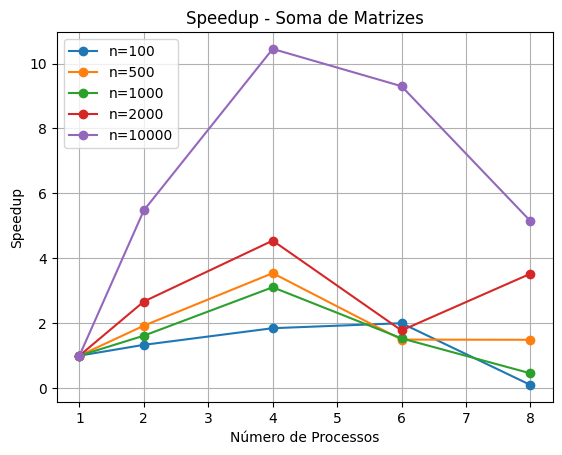

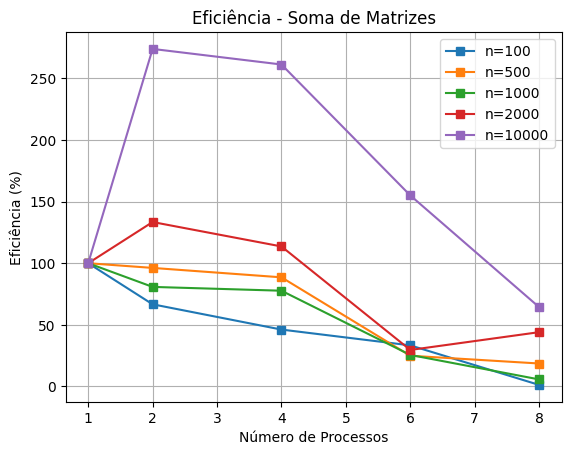

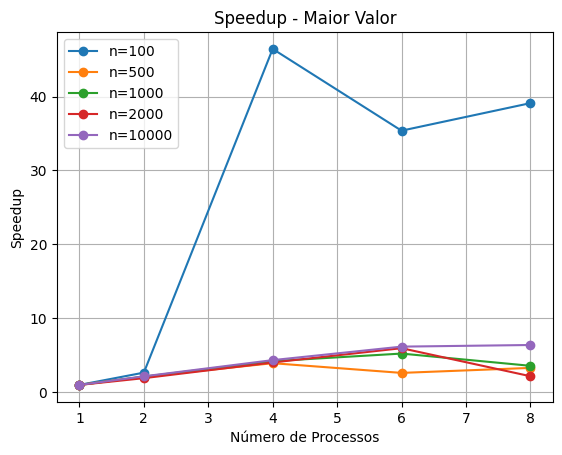

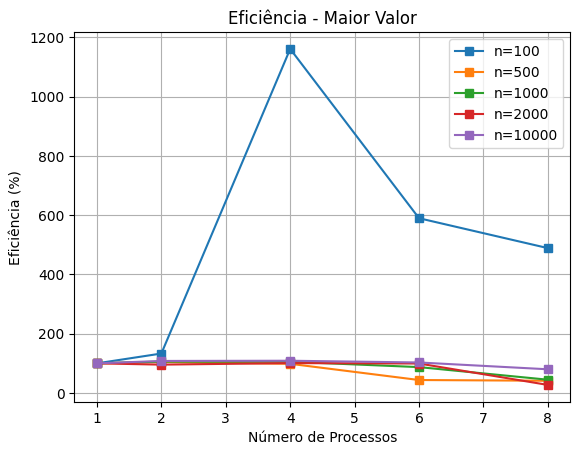

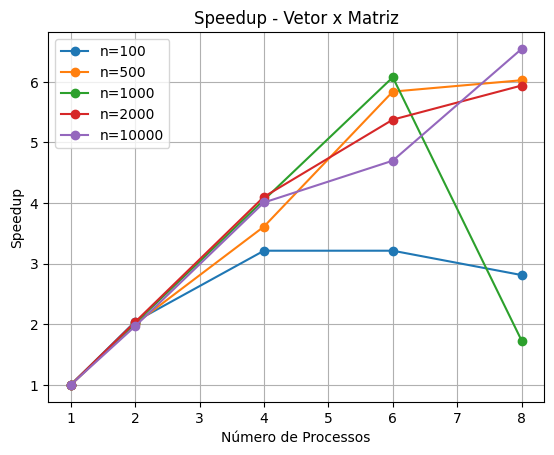

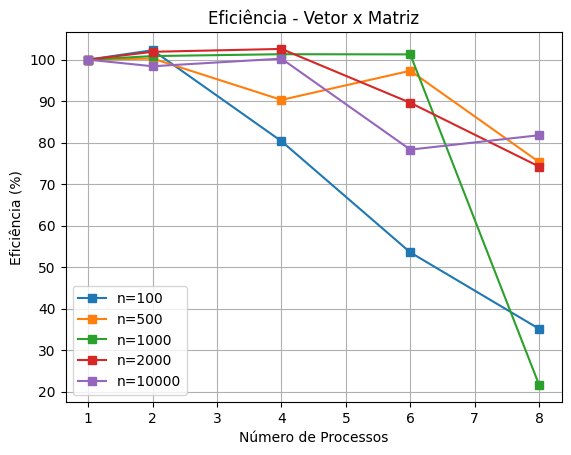

In [19]:
# Plotagem dos resultados
for nome, dados in resultados.items():
    for n, tempos in dados.items():
        speedups, _ = calcular_speedup_eficiencia(tempos)

        plt.plot(processos, [speedups[p] for p in processos],
                 marker='o', label=f'n={n}')

    plt.title(f'Speedup - {nome}')
    plt.xlabel('Número de Processos')
    plt.ylabel('Speedup')
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.close()

    for n, tempos in dados.items():
        _, eficiencias = calcular_speedup_eficiencia(tempos)
        plt.plot(processos, [eficiencias[p]*100 for p in processos],
                 marker='s', label=f'n={n}')

    plt.title(f'Eficiência - {nome}')
    plt.xlabel('Número de Processos')
    plt.ylabel('Eficiência (%)')
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.close()

In [20]:
# Tabela

for nome, dados in resultados.items():
    print(f"\nResultados para {nome}:\n")
    print(f"{'Tamanho':>10} | {'Processos':>10} | {'Tempo (s)':>10} | {'Speedup':>10} | {'Eficiência (%)':>15}")
    print("-" * 70)
    for n, tempos in dados.items():
        speedups, eficiencias = calcular_speedup_eficiencia(tempos)
        for p in processos:
            t = tempos[p]
            s = speedups[p]
            e = eficiencias[p] * 100
            print(f"{n:>10} | {p:>10} | {t:>10.4f} | {s:>10.4f} | {e:>15.2f}")
    print("\n")


Resultados para Soma de Matrizes:

   Tamanho |  Processos |  Tempo (s) |    Speedup |  Eficiência (%)
----------------------------------------------------------------------
       100 |          1 |     0.0000 |     1.0000 |          100.00
       100 |          2 |     0.0000 |     1.3333 |           66.67
       100 |          4 |     0.0000 |     1.8462 |           46.15
       100 |          6 |     0.0000 |     2.0000 |           33.33
       100 |          8 |     0.0002 |     0.0984 |            1.23
       500 |          1 |     0.0008 |     1.0000 |          100.00
       500 |          2 |     0.0004 |     1.9239 |           96.19
       500 |          4 |     0.0002 |     3.5421 |           88.55
       500 |          6 |     0.0005 |     1.4951 |           24.92
       500 |          8 |     0.0005 |     1.4892 |           18.61
      1000 |          1 |     0.0029 |     1.0000 |          100.00
      1000 |          2 |     0.0018 |     1.6156 |           80.78
      100